In [89]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

#for deep learning
import keras
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Masking, Dropout
from keras.optimizers import RMSprop,Adam
from keras.callbacks import History
from keras import callbacks

### Read Train and Test Processed Data

In [90]:
train_data = pd.read_csv('train_group.csv')
test_data = pd.read_csv('test_group.csv')
# test_data = test_data.drop('RUL', axis=1)

In [91]:
# Replace NaN with a Default Value (0)
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [92]:
# Print train dataset
train_data

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,...,s_20_lag_1,s_20_lag_2,s_20_lag_3,s_20_lag_4,s_20_lag_5,s_21_lag_1,s_21_lag_2,s_21_lag_3,s_21_lag_4,s_21_lag_5
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,...,0.713178,0.000000,0.000000,0.000000,0.000000,0.724662,0.000000,0.000000,0.000000,0.000000
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,...,0.666667,0.713178,0.000000,0.000000,0.000000,0.731014,0.724662,0.000000,0.000000,0.000000
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,...,0.627907,0.666667,0.713178,0.000000,0.000000,0.621375,0.731014,0.724662,0.000000,0.000000
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,...,0.573643,0.627907,0.666667,0.713178,0.000000,0.662386,0.621375,0.731014,0.724662,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,...,0.000000,0.186047,0.255814,0.325581,0.193798,0.411627,0.328915,0.177851,0.252416,0.314278
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,...,0.271318,0.000000,0.186047,0.255814,0.325581,0.109500,0.411627,0.328915,0.177851,0.252416
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,...,0.124031,0.271318,0.000000,0.186047,0.255814,0.366197,0.109500,0.411627,0.328915,0.177851
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,...,0.232558,0.124031,0.271318,0.000000,0.186047,0.053991,0.366197,0.109500,0.411627,0.328915


In [93]:
# Print train dataset
test_data

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,...,s_20_lag_1,s_20_lag_2,s_20_lag_3,s_20_lag_4,s_20_lag_5,s_21_lag_1,s_21_lag_2,s_21_lag_3,s_21_lag_4,s_21_lag_5
0,1,1,0.596215,0.421968,0.282214,0.608871,0.365854,0.196475,0.273973,0.534247,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,0.182965,0.504025,0.225240,0.800403,0.292683,0.229042,0.479452,0.634703,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.620099,0.000000,0.000000,0.000000,0.000000
2,1,3,0.419558,0.464814,0.346130,0.651210,0.390244,0.248506,0.479452,0.591324,...,0.645455,0.500000,0.000000,0.000000,0.000000,0.645718,0.620099,0.000000,0.000000,0.000000
3,1,4,0.413249,0.391587,0.449867,0.643145,0.341463,0.159080,0.328767,0.456621,...,0.700000,0.645455,0.500000,0.000000,0.000000,0.681104,0.645718,0.620099,0.000000,0.000000
4,1,5,0.435331,0.471306,0.357974,0.661290,0.292683,0.153410,0.349315,0.632420,...,0.627273,0.700000,0.645455,0.500000,0.000000,0.620382,0.681104,0.645718,0.620099,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.665615,0.789665,0.641209,0.510081,0.317073,0.902989,0.609589,0.299087,...,0.290909,0.418182,0.527273,0.390909,0.363636,0.509271,0.395471,0.414013,0.594055,0.542675
13092,100,195,0.659306,0.692028,0.769042,0.471774,0.390244,0.890038,0.547945,0.381279,...,0.309091,0.290909,0.418182,0.527273,0.390909,0.370842,0.509271,0.395471,0.414013,0.594055
13093,100,196,0.728707,0.626071,0.458036,0.435484,0.536585,0.937011,0.527397,0.410959,...,0.236364,0.309091,0.290909,0.418182,0.527273,0.483652,0.370842,0.509271,0.395471,0.414013
13094,100,197,0.671924,0.673851,0.714111,0.502016,0.439024,0.952644,0.554795,0.445205,...,0.281818,0.236364,0.309091,0.290909,0.418182,0.381741,0.483652,0.370842,0.509271,0.395471


In [94]:
# Check shape
print(train_data.shape)
print(test_data.shape)

(20631, 87)
(13096, 86)


In [95]:
# Load original RUL values
y_true = pd.read_csv("data/RUL_FD001.txt", delim_whitespace=True,names=["RUL"])


In [96]:
y_true

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [97]:
y_true["unit_number"] = y_true.index

In [98]:
# Print train dataset
y_true

,RUL,unit_number
0,112,0
1,98,1
2,69,2
3,82,3
4,91,4
...,...,...
95,137,95
96,82,96
97,59,97
98,117,98


In [99]:
# Check the shape of Y_TRUE
print(y_true.shape)

(100, 2)


# MinMax scaling

### For training Data

In [100]:
# Define the feature columns for scaling (excluding 'RUL' and 'unit_number')
train_columns = [column for column in train_data.columns if column not in ['RUL', 'unit_number']]

# Apply MinMax scaling to the training data
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
train_data[train_columns] = min_max_scaler.fit_transform(train_data[train_columns])

# Check the shape of the training data
print(train_data.shape)

# Verify the first few rows of the training data
train_data.head()

(20631, 87)


,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,...,s_20_lag_1,s_20_lag_2,s_20_lag_3,s_20_lag_4,s_20_lag_5,s_21_lag_1,s_21_lag_2,s_21_lag_3,s_21_lag_4,s_21_lag_5
0,-1.0,-1.000000,-0.632530,-0.186396,-0.380486,0.452496,-0.515152,-0.780490,-0.261905,0.266525,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1,-1.0,-0.994460,-0.433735,-0.093961,-0.294733,0.256039,-0.575758,-0.799515,-0.238095,0.530917,...,0.426357,-1.000000,-1.000000,-1.000000,-1.0,0.449323,-1.000000,-1.000000,-1.000000,-1.0
2,-1.0,-0.988920,-0.313253,-0.260955,-0.258947,0.420290,-0.454545,-0.719914,-0.500000,0.590618,...,0.333333,0.426357,-1.000000,-1.000000,-1.0,0.462027,0.449323,-1.000000,-1.000000,-1.0
3,-1.0,-0.983380,-0.313253,-0.487683,-0.337610,0.481481,-0.363636,-0.750965,-0.666667,0.778252,...,0.255814,0.333333,0.426357,-1.000000,-1.0,0.242751,0.462027,0.449323,-1.000000,-1.0
4,-1.0,-0.977839,-0.301205,-0.485066,-0.190749,0.336554,-0.515152,-0.700081,-0.488095,0.492537,...,0.147287,0.255814,0.333333,0.426357,-1.0,0.324772,0.242751,0.462027,0.449323,-1.0


In [101]:
# Define the feature columns for scaling (excluding 'RUL' and 'unit_number')
test_columns = [column for column in test_data.columns if column not in ['RUL', 'unit_number']]

# Apply MinMax scaling to the training data
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
test_data[test_columns] = min_max_scaler.fit_transform(test_data[test_columns])

# Check the shape of the training data
print(test_data.shape)

# Verify the first few rows of the training data
test_data.head()

(13096, 86)


,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,...,s_20_lag_1,s_20_lag_2,s_20_lag_3,s_20_lag_4,s_20_lag_5,s_21_lag_1,s_21_lag_2,s_21_lag_3,s_21_lag_4,s_21_lag_5
0,-1.0,-1.000000,0.192429,-0.156063,-0.435573,0.217742,-0.268293,-0.607050,-0.452055,0.068493,...,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1,-1.0,-0.993377,-0.634069,0.008050,-0.549520,0.600806,-0.414634,-0.541916,-0.041096,0.269406,...,0.000000,-1.000000,-1.000000,-1.0,-1.0,0.240198,-1.000000,-1.000000,-1.000000,-1.0
2,-1.0,-0.986755,-0.160883,-0.070371,-0.307739,0.302419,-0.219512,-0.502989,-0.041096,0.182648,...,0.290909,0.000000,-1.000000,-1.0,-1.0,0.291437,0.240198,-1.000000,-1.000000,-1.0
3,-1.0,-0.980132,-0.173502,-0.216827,-0.100265,0.286290,-0.317073,-0.681839,-0.342466,-0.086758,...,0.400000,0.290909,0.000000,-1.0,-1.0,0.362208,0.291437,0.240198,-1.000000,-1.0
4,-1.0,-0.973510,-0.129338,-0.057388,-0.284051,0.322581,-0.414634,-0.693180,-0.301370,0.264840,...,0.254545,0.400000,0.290909,0.0,-1.0,0.240764,0.362208,0.291437,0.240198,-1.0


In [102]:
# test_data = test_data.drop('RUL', axis=1)
# test_data

In [103]:
print(type(test_data))

<class 'pandas.core.frame.DataFrame'>


### LSTM expects an input in the shape of a numpy array of 3 dimensions and I will need to convert train and test data accordingly.

In [104]:
def gen_train(data, seq_length, seq_cols):
    """
        function to prepare train data into (samples, time steps, features)
        id_df = train dataframe
        seq_length = look back period
        seq_cols = feature columns
    """
        
    data_array = data[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    
    for start, stop in zip(range(0, num_elements-seq_length+1), range(seq_length, num_elements+1)):
        lstm_array.append(data_array[start:stop, :])
    
    return np.array(lstm_array)

### Let's explain the above function

In [105]:
# # Let's check our train data
# train_data.head()

In [106]:
seq_cols = [column for column in train_data.columns if column !="RUL"]
print(seq_cols)

['unit_nr', 'time_cycles', 's_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21', 's_2_lag_1', 's_2_lag_2', 's_2_lag_3', 's_2_lag_4', 's_2_lag_5', 's_3_lag_1', 's_3_lag_2', 's_3_lag_3', 's_3_lag_4', 's_3_lag_5', 's_4_lag_1', 's_4_lag_2', 's_4_lag_3', 's_4_lag_4', 's_4_lag_5', 's_7_lag_1', 's_7_lag_2', 's_7_lag_3', 's_7_lag_4', 's_7_lag_5', 's_8_lag_1', 's_8_lag_2', 's_8_lag_3', 's_8_lag_4', 's_8_lag_5', 's_9_lag_1', 's_9_lag_2', 's_9_lag_3', 's_9_lag_4', 's_9_lag_5', 's_11_lag_1', 's_11_lag_2', 's_11_lag_3', 's_11_lag_4', 's_11_lag_5', 's_12_lag_1', 's_12_lag_2', 's_12_lag_3', 's_12_lag_4', 's_12_lag_5', 's_13_lag_1', 's_13_lag_2', 's_13_lag_3', 's_13_lag_4', 's_13_lag_5', 's_14_lag_1', 's_14_lag_2', 's_14_lag_3', 's_14_lag_4', 's_14_lag_5', 's_15_lag_1', 's_15_lag_2', 's_15_lag_3', 's_15_lag_4', 's_15_lag_5', 's_17_lag_1', 's_17_lag_2', 's_17_lag_3', 's_17_lag_4', 's_17_lag_5', 's_20_lag_1', 's_20_lag_2', 's_20_lag_3', 's_20_lag_4', '

In [107]:
data_array = train_data[seq_cols].values
data_array

array([[-1.        , -1.        , -0.63253012, ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -0.99445983, -0.43373494, ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -0.98891967, -0.31325301, ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [ 1.        ,  0.09141274,  0.3313253 , ..., -0.17674676,
        -0.34217067, -0.64429716],
       [ 1.        ,  0.09695291,  0.21686747, ..., -0.78099972,
        -0.17674676, -0.34217067],
       [ 1.        ,  0.10249307,  0.59036145, ..., -0.26760563,
        -0.78099972, -0.17674676]])

In [108]:
# print(data_array.shape)

In [109]:
# num_elements = data_array.shape[0]
# print(num_elements)

In [110]:
# lstm_array=[]

# seq_length = 50

In [111]:
# check1 = range(0, num_elements-seq_length+1)
# print(check1)

In [112]:
# check2 = range(seq_length, num_elements+1)
# print(check2)

In [113]:
# for start, stop in zip(range(0, num_elements-seq_length+1), range(seq_length, num_elements+1)):
#     lstm_array.append(data_array[start:stop, :])

In [114]:
# print(lstm_array)

In [115]:
# print(np.array(lstm_array))

In [116]:
def gen_target(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length-1:num_elements+1]

In [117]:
def gen_test(id_df, seq_length, seq_cols, mask_value):
    """
        function to prepare test data into (samples, time steps, features)
        function only returns last sequence of data for every unit
        id_df = test dataframe
        seq_length = look back period
        seq_cols = feature columns
    """
    df_mask = pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    df_mask[:] = mask_value
    
    id_df = df_mask.append(id_df,ignore_index=True)
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    
    start = num_elements-seq_length
    stop = num_elements
    
    lstm_array.append(data_array[start:stop, :])
    
    return np.array(lstm_array)

In [118]:
sequence_length = 50
mask_value = 0

In [119]:
#generate train
x_train=np.concatenate(list(list(gen_train(train_data[train_data['unit_nr']==unit], sequence_length, seq_cols)) for unit in train_data['unit_nr'].unique()))
print(x_train.shape)

(15731, 50, 86)


In [120]:
#generate target of train
y_train = np.concatenate(list(list(gen_target(train_data[train_data['unit_nr']==unit], sequence_length, "RUL")) for unit in train_data['unit_nr'].unique()))
y_train.shape

(15731,)

In [121]:
#generate test
x_test=np.concatenate(list(list(gen_test(test_data[test_data['unit_nr']==unit], sequence_length, seq_cols, mask_value)) for unit in test_data['unit_nr'].unique()))
print(x_test.shape)

(100, 50, 86)


C:\Users\user\AppData\Local\Temp\ipykernel_19920\3243649304.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  id_df = df_mask.append(id_df,ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_19920\3243649304.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  id_df = df_mask.append(id_df,ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_19920\3243649304.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  id_df = df_mask.append(id_df,ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_19920\3243649304.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  id_df = df_mask.append(id_df,ignore_index=True)


In [122]:
#true target of test 
y_test = y_true.RUL.values
y_test.shape

(100,)

# LSTM Model

In [123]:
nb_features = x_train.shape[2]
nb_out = 1

In [124]:
nb_features

86

In [125]:
# Define your custom learning rate (e.g., 0.001)
custom_learning_rate = 0.001

# Create an optimizer with the custom learning rate
custom_optimizer = Adam(learning_rate=custom_learning_rate)

In [126]:
history = History()

model = Sequential()
model.add(LSTM(
         units=100,
         return_sequences=True,
         input_shape=(sequence_length, nb_features)))
model.add(Dropout(0.2))
model.add(LSTM(
          units=100,
          return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='relu'))
model.add(Activation("relu"))
model.compile(loss="mse", optimizer=custom_optimizer, metrics=['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 100)           74800     
                                                                 
 dropout_4 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 155,301
Trainable params: 155,301
Non-tr

In [127]:
%%time
# Fit the model without early stopping
model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1, callbacks=[history])


Epoch 1/100
222/222 [==============================] - 11s 38ms/step - loss: 4564.0513 - mse: 4564.0513 - val_loss: 3971.0239 - val_mse: 3971.0239
Epoch 2/100
222/222 [==============================] - 8s 34ms/step - loss: 2815.1335 - mse: 2815.1335 - val_loss: 2696.8650 - val_mse: 2696.8650
Epoch 3/100
222/222 [==============================] - 8s 34ms/step - loss: 1965.9296 - mse: 1965.9296 - val_loss: 1675.3301 - val_mse: 1675.3301
Epoch 4/100
222/222 [==============================] - 7s 34ms/step - loss: 1068.7365 - mse: 1068.7365 - val_loss: 955.5845 - val_mse: 955.5845
Epoch 5/100
222/222 [==============================] - 7s 34ms/step - loss: 628.8594 - mse: 628.8594 - val_loss: 590.6852 - val_mse: 590.6852
Epoch 6/100
222/222 [==============================] - 8s 34ms/step - loss: 390.6766 - mse: 390.6766 - val_loss: 355.0607 - val_mse: 355.0607
Epoch 7/100
222/222 [==============================] - 8s 34ms/step - loss: 264.1761 - mse: 264.1761 - val_loss: 259.4136 - val_mse: 

Epoch 59/100
222/222 [==============================] - 8s 34ms/step - loss: 26.0654 - mse: 26.0654 - val_loss: 159.5788 - val_mse: 159.5788
Epoch 60/100
222/222 [==============================] - 8s 35ms/step - loss: 26.2776 - mse: 26.2776 - val_loss: 162.1202 - val_mse: 162.1202
Epoch 61/100
222/222 [==============================] - 8s 35ms/step - loss: 27.4804 - mse: 27.4804 - val_loss: 189.2378 - val_mse: 189.2378
Epoch 62/100
222/222 [==============================] - 8s 34ms/step - loss: 25.7907 - mse: 25.7907 - val_loss: 144.9125 - val_mse: 144.9125
Epoch 63/100
222/222 [==============================] - 8s 35ms/step - loss: 33.8323 - mse: 33.8323 - val_loss: 185.5224 - val_mse: 185.5224
Epoch 64/100
222/222 [==============================] - 8s 34ms/step - loss: 27.7112 - mse: 27.7112 - val_loss: 151.9995 - val_mse: 151.9995
Epoch 65/100
222/222 [==============================] - 8s 34ms/step - loss: 24.9743 - mse: 24.9743 - val_loss: 144.4654 - val_mse: 144.4654
Epoch 66/100


In [128]:
# %%time
# # Fit the model
# model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1,
#           callbacks=[history, keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')])


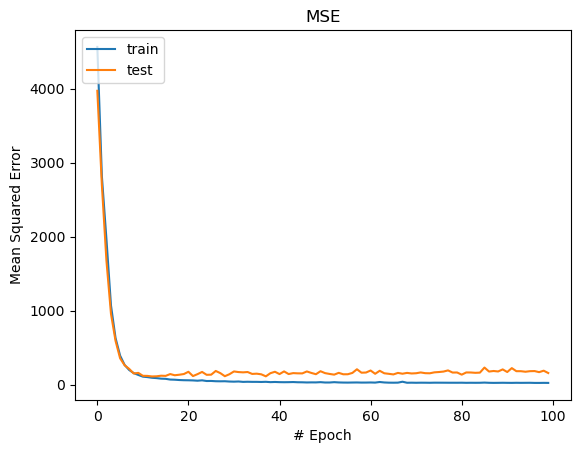

In [129]:
plt.plot(history.history['mse'])  # Use 'mse' instead of 'mean_squared_error'
plt.plot(history.history['val_mse'])  # Use 'val_mse' instead of 'val_mean_squared_error'
plt.title('MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('# Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Results on Train Set

In [130]:
scores = model.evaluate(x_train, y_train, verbose=1, batch_size=200)
print('MSE: {}'.format(scores[1]))

79/79 [==============================] - 2s 28ms/step - loss: 18.7049 - mse: 18.7049
MSE: 18.70492172241211


# Results on Test Set

In [131]:
scores_test = model.evaluate(x_test, y_test, verbose=2)
print('MSE: {}'.format(scores_test[1]))

4/4 - 0s - loss: 877.4444 - mse: 877.4444 - 48ms/epoch - 12ms/step
MSE: 877.4443969726562


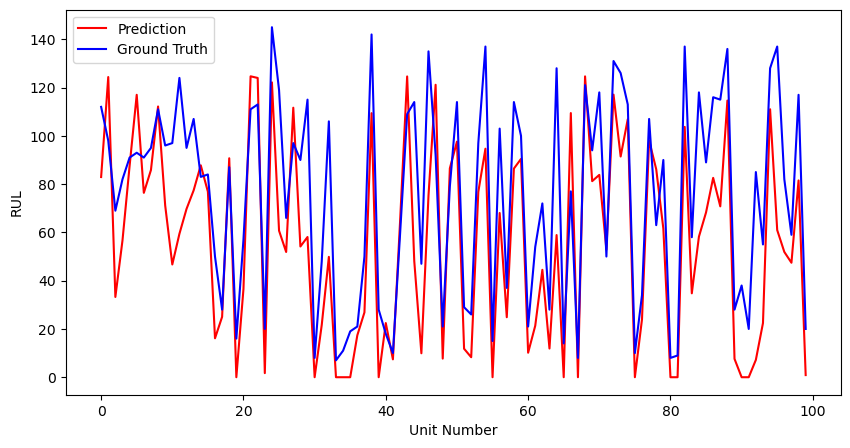

In [132]:
y_pred_test = model.predict(x_test, verbose=0)

plt.figure(figsize=(10,5))
plt.plot(y_pred_test, color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Ground Truth')
plt.ylabel("RUL")
plt.xlabel("Unit Number")
plt.legend(loc='upper left')
plt.show()